<a href="https://colab.research.google.com/github/akashkivani/almabetter-MLYesBank-RegressionProject/blob/main/YES_BANK_Stock_closing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YES BANK stock closing price prediction

---



---



Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the
news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting
to see how that impacted the stock prices of the company and whether Time series models
or any other predictive models can do justice to such situations. This dataset has monthly
stock prices of the bank since its inception and includes closing, starting, highest, and lowest
stock prices of every month. The main objective is to predict the stock’s closing price of the
month.

0. Importing libraries & Mounting data.

---



In [1]:
#Importing EDA libs. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import math

In [2]:
#Importing ML libs. 

from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/Data Science/AlmaBetter School/Capstone/Project 2/Data/data_YesBank_StockPrices.csv'

yes_df = pd.read_csv(file_path)

0. Initial exploration

---


In [5]:
yes_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [6]:
yes_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [7]:
yes_df.shape

(185, 5)

*This is a relatively smaller data with just 5 columns.*

In [8]:
yes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [9]:
yes_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [10]:
yes_df.describe(include = 'all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


1. Clean-up

---



In [11]:
yes_df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

*Thus, no missing value in our data.*

In [12]:
yes_df.duplicated().sum()

0

*Thus, no duplicate rows are there in our data.*

In [13]:
yes_df.dtypes #Checking data typpes.

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

The of 'date' columns is as object type, changing it to date for better analysis. 

In [14]:
from datetime import datetime #importing lib for changing

In [15]:
yes_df['Date'] = yes_df['Date'].apply(lambda x: datetime.strptime(x , '%b-%y'))

In [16]:
yes_df.dtypes

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object

*The format is sucessfully changed.*

2. EDA ( Exploratory Data Analysis)

---




Our target is to predict the closing price, thus let's at first see closing price, as reported in 'close' cloumn of data. 

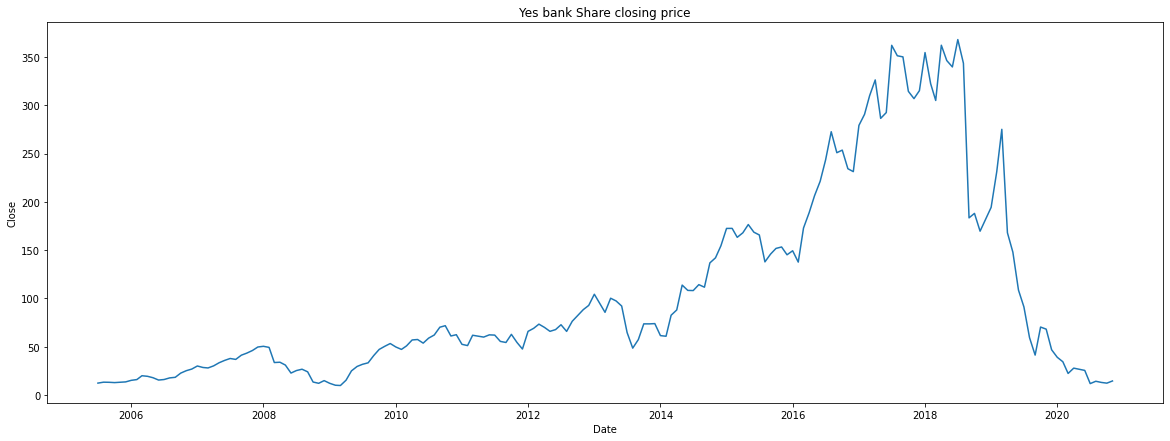

In [17]:
plt.figure(figsize= (20,7))
plt.title('Yes bank Share closing price')
sns.lineplot(x='Date' , y = 'Close' , data = yes_df)

*As clear by graph, the share price was increasing from 2014-2018, then it had a sharp decline. It increased again in 2019, but declined again.*

*Let's see the distibution plot of our target variable, i.e. closing price/close.*

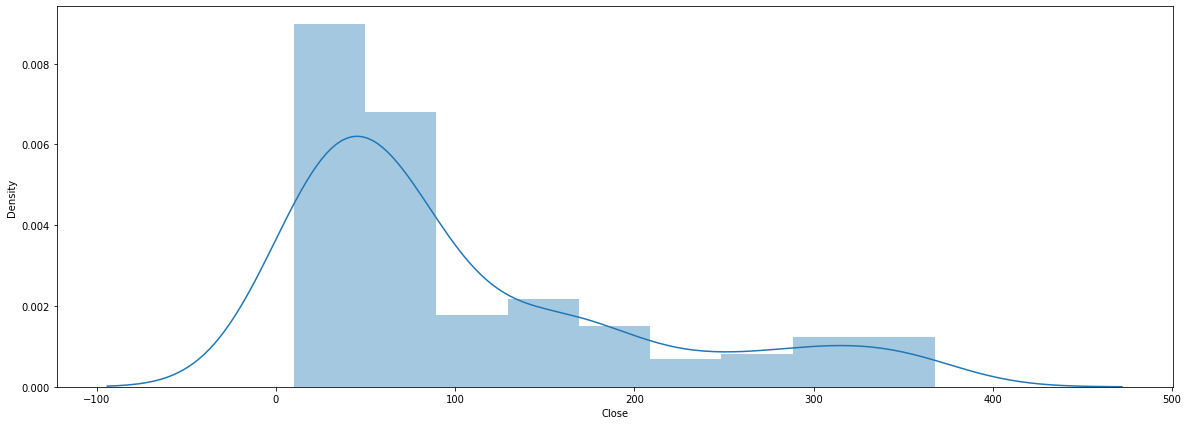

In [18]:
plt.figure(figsize = (20,7))
sns.distplot(yes_df['Close'] , kde= 'True')

*As visible here, the data is skewed towards right, thus right skewed distribution. We will apply log transformation during pre-processing to make it more uniform.*

*Let's check out the distributiuon of independent variable. All column except close is independent for our modelling, like high, low, date and open.*

Text(0.5, 1.0, 'Lowest price of day distribution')

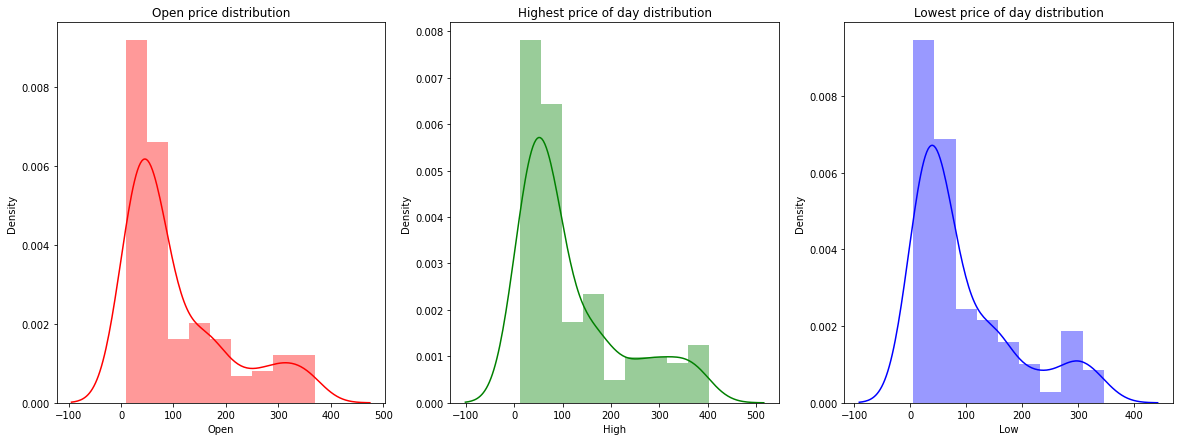

In [19]:
plt.figure(figsize = (20,7))

#Creating different subplots. 

plt.subplot(1,3,1)
sns.distplot(yes_df['Open'], color = 'Red')
plt.title('Open price distribution')

plt.subplot(1,3,2)
sns.distplot(yes_df['High'] , color = 'Green')
plt.title('Highest price of day distribution')

plt.subplot(1,3,3)
sns.distplot(yes_df['Low'] , color = 'Blue')
plt.title('Lowest price of day distribution')

*All the above distribution looks right-skewed thus we will later apply log transformation to introduce some normalization.*

*Let's visualize the variation of our target(closing price) w.r.t. all our independent variable/feature, with a simple best fit line*

Text(0.5, 1.0, 'Low vs Close')

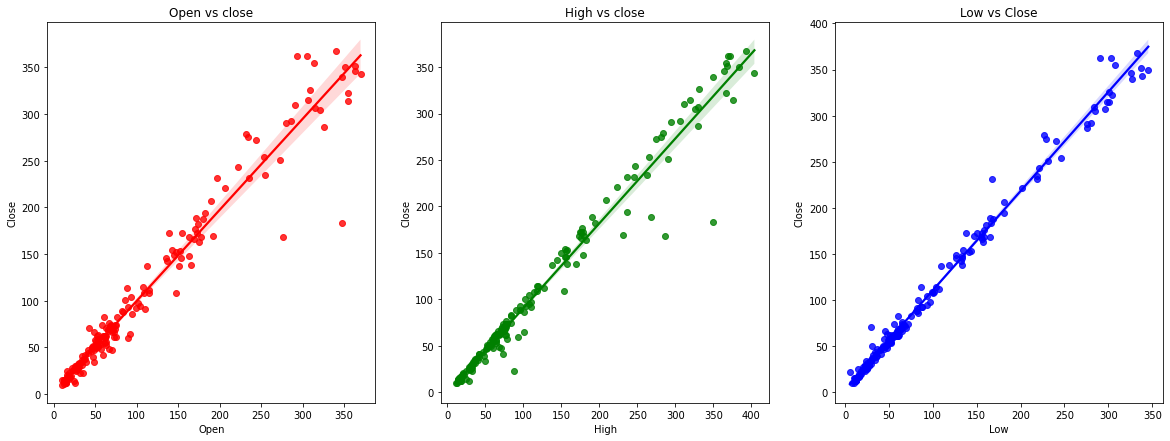

In [20]:
plt.figure(figsize = (20,7))

#creating different subplot again. 

plt.subplot(1,3,1)
sns.regplot(x='Open' , 
            y='Close',
            data = yes_df , color = 'Red')
plt.title('Open vs close')

plt.subplot(1,3,2)
sns.regplot(x='High' , 
            y='Close',
            data = yes_df , color = 'Green')
plt.title('High vs close')


plt.subplot(1,3,3)
sns.regplot(x='Low' , 
            y='Close',
            data = yes_df , color = 'Blue')
plt.title('Low vs Close')


*Thus, all the Regression lines shows a relation , it seems all independent variables are directly proprotional to the target.*

*Let's see the corelation of our independent variable.*

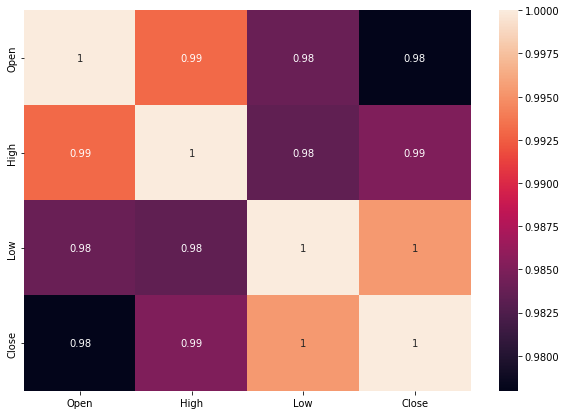

In [21]:
plt.figure(figsize = (10,7))

sns.heatmap(yes_df.corr(), annot = True)

*This shows a very high corelation. We will handle it in feature engineering section.*

*Let's check the box plot.*

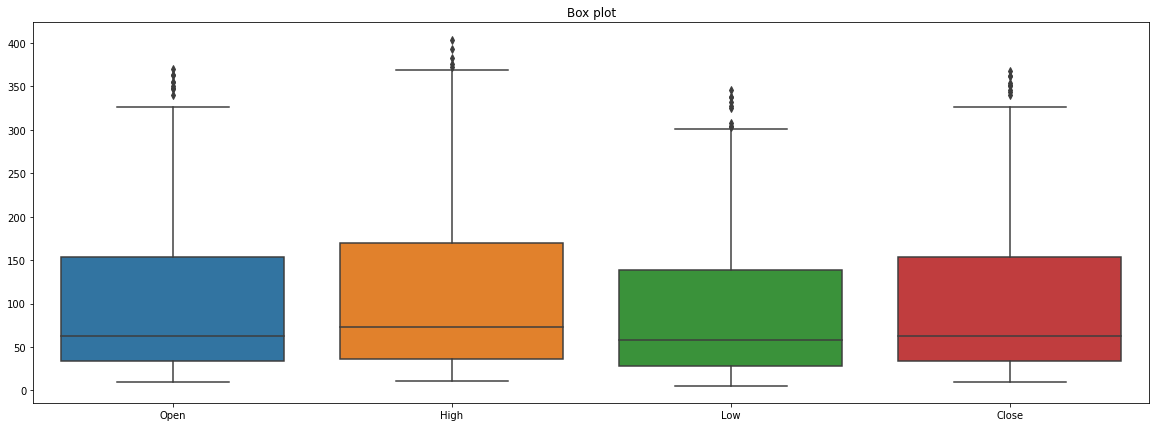

In [22]:
plt.figure(figsize = (20,7))
plt.title('Box plot')
sns.boxplot(data = yes_df)

3. Feature Engineering

---

Handling the high co-relation  here.

5. Model implementation

---



a. Train-test slip

At first I will distribute the data for training the model as train and for testing the model and test. 

In [23]:
x = yes_df.drop(columns = ['Close' , 'Date'])  #X is independent variable, or feature. Dropping the target variable and data as it's not a feature. 
y = yes_df['Close'] # closing price is out target.

In [24]:
#Data transformation

from scipy.stats import zscore #importing necessary lib. 

x = x.apply(zscore)
y = np.log10(y)

In [25]:
x_train , x_test , y_train , y_test = train_test_split( x, y , test_size = 0.2 , random_state = 1) #splitting data.

In [26]:
print(f'Shape of training variable data : {x_train.shape}, shape of testing variable data is{x_test.shape}')
print(f'Shape of training target data : {y_train.shape}, shape of testing target data is{y_test.shape}')

Shape of training variable data : (148, 3), shape of testing variable data is(37, 3)
Shape of training target data : (148,), shape of testing target data is(37,)


*We will apply a number of regression model and compare there accuracy.*

1. Linear Regression

---



In [27]:
regressor = LinearRegression() #Setting up regressor model

In [28]:
regressor.fit(x_train , y_train) #fitting model

LinearRegression()

In [29]:
#Scoring training

regressor.score(x_train , y_train)

0.8146653424416905

In [30]:
#scoring test

regressor.score(x_test , y_test)

0.8225699915389754

In [32]:
#Let's see how it does in testing data.

y_pred = regressor.predict(x_test)
y_pred

array([1.51738682, 1.53211837, 1.63519027, 1.47539354, 2.01471458,
       2.74366588, 1.62601875, 1.51851685, 1.52352095, 1.62092587,
       2.07716025, 1.61560053, 1.47290774, 2.63685207, 1.70384859,
       1.61032504, 1.52501328, 1.95399032, 1.81967493, 1.76423173,
       1.53162271, 1.480381  , 1.83883617, 1.6394682 , 2.05986731,
       1.49003242, 1.4767562 , 1.61402383, 1.53535964, 1.66894676,
       2.4177132 , 2.75914846, 1.68261819, 2.34869197, 1.78260049,
       1.62415017, 2.34100799])

In [34]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [39]:
#Making a DF for testing data.

test_df = pd.DataFrame(y_test)
test_df.rename(columns = {'close' : 'Actual closing price'} , inplace = True)
test_df['Predicted closing price'] = y_pred

test_df.head()

,Close,Predicted closing price
16,1.403464,1.517387
179,1.408240,1.532118
66,1.720903,1.635190
40,1.088490,1.475394
166,2.170115,2.014715


In [37]:
#Performance:


print("MSE value :", round(mean_squared_error(y_test, y_pred), 4))
print("RMSE value :", round(math.sqrt(mean_squared_error(y_test, y_pred)), 4)) 
print("MAE value :", round(mean_absolute_error(y_test, y_pred), 4))
print("MAPE value :", round(mean_absolute_percentage_error(y_test, y_pred), 4))
print("r2 score :", round(r2_score(y_test, y_pred),4))

MSE value : 0.0316
RMSE value : 0.1777
MAE value : 0.1513
MAPE value : 0.0954
r2 score : 0.8226


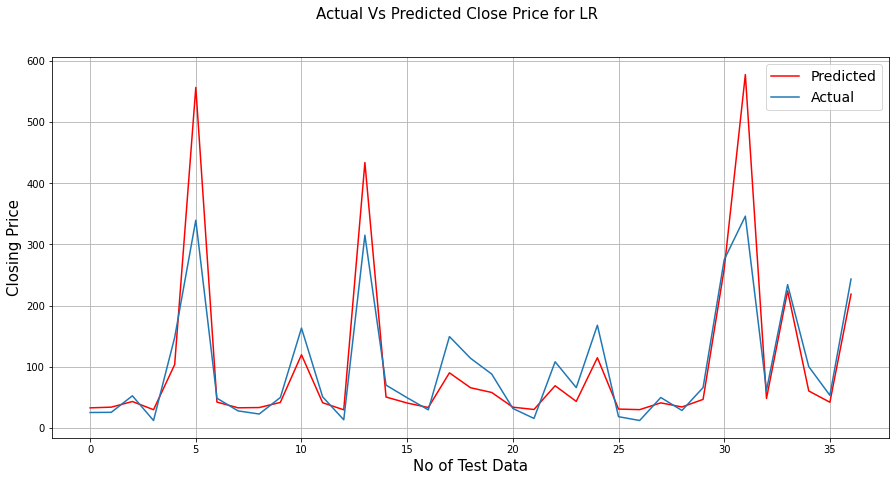

In [54]:
# Actual Price vs predicted price plot.

plt.figure(figsize=(15,7))
plt.plot(10**(y_pred),color='red')
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Close Price for LR', fontsize =15)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 15)
plt.ylabel('Closing Price', fontsize= 15)
plt.grid(True)

2. Ridge regression

---



In [44]:
from sklearn.linear_model import Ridge #importing lib

In [45]:
model = Ridge (alpha = 0.1) #setting model as Ridge

model.fit(x_train , y_train) #fitting model

Ridge(alpha=0.1)

In [46]:
model.score(x_train , y_train) #training score

0.81465524840887

In [47]:
model.score(x_test , y_test) #testing score

0.8221357979190861

In [48]:
y_pred = model.predict(x_test)
y_pred

#(using same variable names as other models to avoid confusion and time)

array([1.51725986, 1.53215164, 1.63600352, 1.47552735, 2.01524649,
       2.74546591, 1.6270459 , 1.51820847, 1.52403533, 1.62122179,
       2.07792883, 1.61563413, 1.47313494, 2.63727671, 1.7042382 ,
       1.61066104, 1.5249501 , 1.95487086, 1.81790128, 1.76386063,
       1.53181029, 1.48079356, 1.8391624 , 1.63839195, 2.06005015,
       1.49026998, 1.47689613, 1.61381392, 1.53558533, 1.66974486,
       2.41507786, 2.76158664, 1.68339463, 2.35025992, 1.78185548,
       1.62422136, 2.33989198])

In [49]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [53]:
test_df = pd.DataFrame(y_test)
test_df.rename(columns = {'close' : 'Actual closing price'} , inplace = True)
test_df['Predicted closing price In Ridge'] = y_pred

test_df.head()

,Close,Predicted closing price In Ridge
16,1.403464,1.517260
179,1.408240,1.532152
66,1.720903,1.636004
40,1.088490,1.475527
166,2.170115,2.015246


In [51]:
# Performance :

# Test Performance
print("MSE score:", round(mean_squared_error (y_test, y_pred), 4))
print("RMSE score:", round(math.sqrt(mean_squared_error (y_test, y_pred)), 4))
print("MAE score:", round(mean_absolute_error(y_test, y_pred), 4))
print("MAPE score:", round(mean_absolute_percentage_error(y_test, y_pred), 4))
print("R2 score:", round(r2_score(y_test, y_pred), 4))

MSE score: 0.0317
RMSE score: 0.1779
MAE score: 0.1514
MAPE score: 0.0955
R2 score: 0.8221


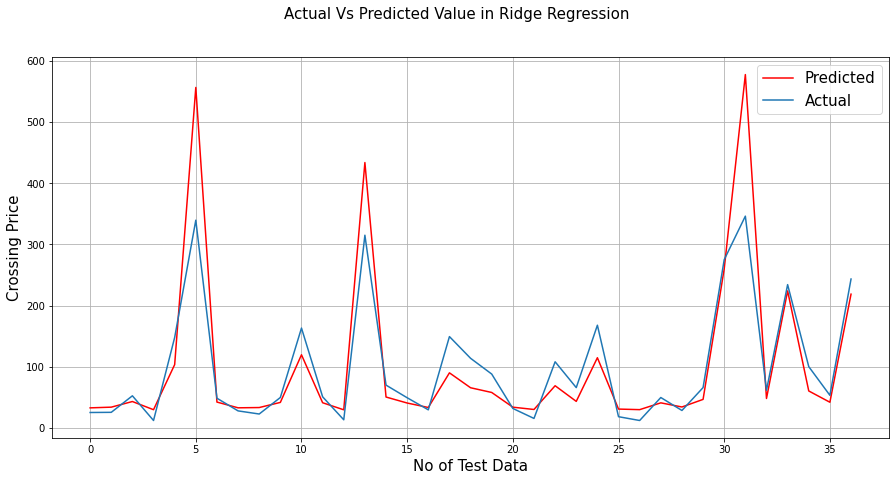

In [55]:
plt.figure(figsize=(15,7))
plt.plot(10**(y_pred),color='red')
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Value in Ridge Regression', fontsize= 15)
plt.legend(['Predicted','Actual'], fontsize = 15)
plt.xlabel('No of Test Data', fontsize = 15)
plt.ylabel('Crossing Price', fontsize= 15)
plt.grid(True)

Using cross - validation on Ridge regression

---



In [56]:
from sklearn.model_selection import GridSearchCV #importing lib

In [57]:
model = Ridge()

In [61]:
parameters = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}
model_cv = GridSearchCV(model, parameters, scoring = 'neg_mean_squared_error', cv=3)

In [62]:
model_cv.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [63]:
print(" The Best Fit Alpha Value is found out to be :", model_cv.best_params_['alpha'])
print(" The negative MSE(mean squared error) score is :", round(model_cv.best_score_, 3))

 The Best Fit Alpha Value is found out to be : 10
 The negative MSE(mean squared error) score is : -0.035


In [64]:
y_pred = model_cv.predict(x_test)

In [65]:
test_df = pd.DataFrame(y_test)
test_df.rename(columns = {'close' : 'Actual closing price'} , inplace = True)
test_df['Predicted closing price In Ridge with cross - validation'] = y_pred

test_df.head()

,Close,Predicted closing price In Ridge with cross - validation
16,1.403464,1.521331
179,1.408240,1.537281
66,1.720903,1.649408
40,1.088490,1.483908
166,2.170115,2.023687


In [66]:
# Performance :

# Test Performance
print("MSE score:", round(mean_squared_error (y_test, y_pred), 4))
print("RMSE score:", round(math.sqrt(mean_squared_error (y_test, y_pred)), 4))
print("MAE score:", round(mean_absolute_error(y_test, y_pred), 4))
print("MAPE score:", round(mean_absolute_percentage_error(y_test, y_pred), 4))
print("R2 score:", round(r2_score(y_test, y_pred), 4))

MSE score: 0.0325
RMSE score: 0.1804
MAE score: 0.1531
MAPE score: 0.0968
R2 score: 0.8172


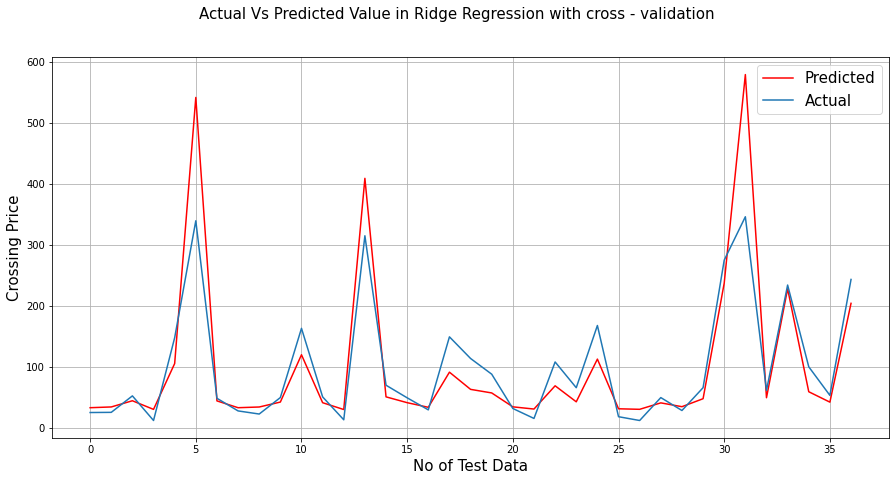

In [68]:
plt.figure(figsize=(15,7))
plt.plot(10**(y_pred),color='red')
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Value in Ridge Regression with cross - validation', fontsize= 15)
plt.legend(['Predicted','Actual'], fontsize = 15)
plt.xlabel('No of Test Data', fontsize = 15)
plt.ylabel('Crossing Price', fontsize= 15)
plt.grid(True)

3. Lasso Regression

---



In [69]:
from sklearn.linear_model import Lasso 
model = Lasso(alpha=0.005, max_iter = 3000)
model.fit(x_train, y_train) 

Lasso(alpha=0.005, max_iter=3000)

In [70]:
model.score(x_train , y_train) #training score

0.8143673030311667

In [71]:
model.score(x_test , y_test) #testing score

0.8199714923878543

In [72]:
y_pred = model.predict(x_test)
y_pred

#(using same variable names as other models to avoid confusion and time)

array([1.52055514, 1.53577312, 1.64073848, 1.48007004, 2.01461217,
       2.74090035, 1.63239804, 1.52091165, 1.52915367, 1.62459958,
       2.07755332, 1.61836076, 1.47805033, 2.62981621, 1.70703685,
       1.61429394, 1.52834077, 1.95620175, 1.81267257, 1.76363424,
       1.53587639, 1.48613456, 1.84020793, 1.63734843, 2.05819259,
       1.49501579, 1.48143852, 1.61577847, 1.53975454, 1.67409294,
       2.40045283, 2.75857291, 1.68748277, 2.3490824 , 1.78025847,
       1.62693942, 2.33097337])

In [73]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [75]:
test_df = pd.DataFrame(y_test)
test_df.rename(columns = {'close' : 'Actual closing price'} , inplace = True)
test_df['Predicted closing price In Lasso'] = y_pred

test_df.head()

,Close,Predicted closing price In Lasso
16,1.403464,1.520555
179,1.408240,1.535773
66,1.720903,1.640738
40,1.088490,1.480070
166,2.170115,2.014612


In [76]:
# Performance :

# Test Performance
print("MSE score:", round(mean_squared_error (y_test, y_pred), 4))
print("RMSE score:", round(math.sqrt(mean_squared_error (y_test, y_pred)), 4))
print("MAE score:", round(mean_absolute_error(y_test, y_pred), 4))
print("MAPE score:", round(mean_absolute_percentage_error(y_test, y_pred), 4))
print("R2 score:", round(r2_score(y_test, y_pred), 4))

MSE score: 0.032
RMSE score: 0.179
MAE score: 0.1523
MAPE score: 0.0962
R2 score: 0.82


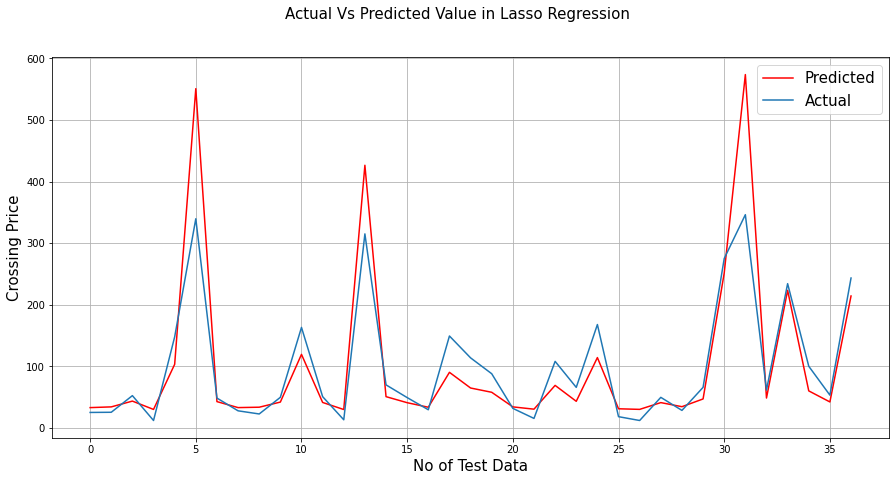

In [77]:
plt.figure(figsize=(15,7))
plt.plot(10**(y_pred),color='red')
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Value in Lasso Regression', fontsize= 15)
plt.legend(['Predicted','Actual'], fontsize = 15)
plt.xlabel('No of Test Data', fontsize = 15)
plt.ylabel('Crossing Price', fontsize= 15)
plt.grid(True)

Using cross - validation on Lasso regression

---



In [78]:
parameters ={'alpha': [1e-15, 1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
model_cv = GridSearchCV(model, parameters,scoring = 'neg_mean_squared_error', cv = 3, return_train_score=True)
model_cv.fit(x_train, y_train) 

GridSearchCV(cv=3, estimator=Lasso(alpha=0.005, max_iter=3000),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [79]:
print(" The best Fit alpha value is found out to be :", round(model_cv.best_params_['alpha'], 4))
print(" The negative mean squared error is : ", round(model_cv. best_score_,4))

 The best Fit alpha value is found out to be : 0.01
 The negative mean squared error is :  -0.0352


In [86]:
y_pred = model_cv.predict(x_test)
y_pred

#(using same variable names as other models to avoid confusion and time)

array([1.5246758 , 1.53967822, 1.64330447, 1.48473667, 2.01244712,
       2.7285637 , 1.63520241, 1.52506422, 1.53318726, 1.62734999,
       2.07429343, 1.62111986, 1.48267825, 2.61894213, 1.7086131 ,
       1.61716593, 1.53236729, 1.9545761 , 1.81309013, 1.76452438,
       1.53980312, 1.49069997, 1.84005176, 1.64003515, 2.05511403,
       1.49942522, 1.48609019, 1.6186234 , 1.54359818, 1.67617522,
       2.39311476, 2.74618564, 1.68942791, 2.34233898, 1.78097189,
       1.62960909, 2.32426455])

In [87]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [88]:
test_df = pd.DataFrame(y_test)
test_df.rename(columns = {'close' : 'Actual closing price'} , inplace = True)
test_df['Predicted closing price In Lasso with Cross-validation'] = y_pred

test_df.head()

,Close,Predicted closing price In Lasso with Cross-validation
16,1.403464,1.524676
179,1.408240,1.539678
66,1.720903,1.643304
40,1.088490,1.484737
166,2.170115,2.012447


In [89]:
# Performance :

# Test Performance
print("MSE score:", round(mean_squared_error (y_test, y_pred), 4))
print("RMSE score:", round(math.sqrt(mean_squared_error (y_test, y_pred)), 4))
print("MAE score:", round(mean_absolute_error(y_test, y_pred), 4))
print("MAPE score:", round(mean_absolute_percentage_error(y_test, y_pred), 4))
print("R2 score:", round(r2_score(y_test, y_pred), 4))

MSE score: 0.0322
RMSE score: 0.1795
MAE score: 0.1528
MAPE score: 0.0968
R2 score: 0.819


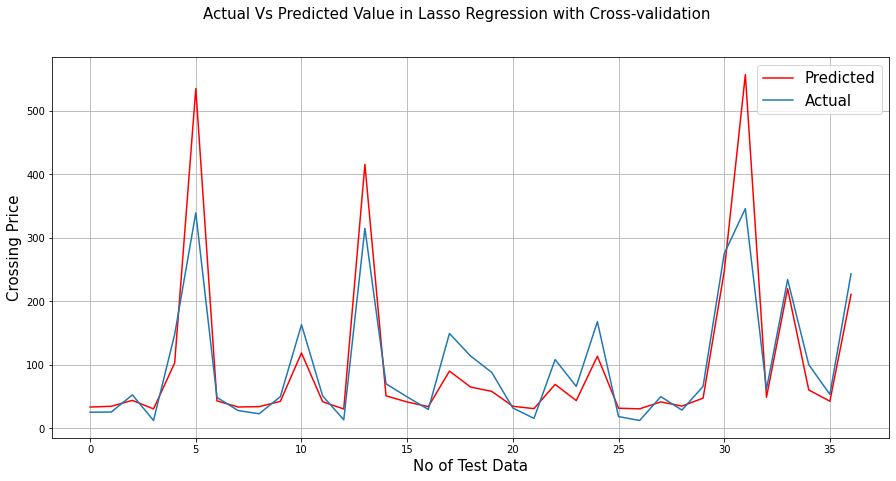

In [90]:
plt.figure(figsize=(15,7))
plt.plot(10**(y_pred),color='red')
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Value in Lasso Regression with Cross-validation', fontsize= 15)
plt.legend(['Predicted','Actual'], fontsize = 15)
plt.xlabel('No of Test Data', fontsize = 15)
plt.ylabel('Crossing Price', fontsize= 15)
plt.grid(True)

4. Elastic Net regression

---



In [91]:
#Importing lib, Setting model and training


from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1,l1_ratio=0.5)
model.fit(x_train,y_train)

ElasticNet(alpha=0.1)

In [92]:
model.score(x_train , y_train) #training score

0.7958095661377872

In [93]:
model.score(x_test , y_test) #testing score

0.7955017101500742

In [94]:
y_pred = model.predict(x_test)
y_pred

#(using same variable names as other models to avoid confusion and time)

array([1.56086628, 1.57468956, 1.67199754, 1.52786225, 1.99947735,
       2.620323  , 1.66975894, 1.56099604, 1.57327896, 1.65381518,
       2.04818128, 1.64463306, 1.52491149, 2.51497513, 1.72340633,
       1.64475613, 1.56826762, 1.94476918, 1.80713181, 1.769077  ,
       1.57643749, 1.53436335, 1.83898052, 1.65870367, 2.02548893,
       1.53981805, 1.52917355, 1.64223008, 1.57915854, 1.69956403,
       2.3103639 , 2.64491655, 1.71211439, 2.29131841, 1.78218876,
       1.65297013, 2.25223609])

In [95]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [96]:
test_df = pd.DataFrame(y_test)
test_df.rename(columns = {'close' : 'Actual closing price'} , inplace = True)
test_df['Predicted closing price In Elastic Net regression'] = y_pred

test_df.head()

,Close,Predicted closing price In Elastic Net regression
16,1.403464,1.560866
179,1.408240,1.574690
66,1.720903,1.671998
40,1.088490,1.527862
166,2.170115,1.999477


In [97]:
# Performance :

# Test Performance
print("MSE score:", round(mean_squared_error (y_test, y_pred), 4))
print("RMSE score:", round(math.sqrt(mean_squared_error (y_test, y_pred)), 4))
print("MAE score:", round(mean_absolute_error(y_test, y_pred), 4))
print("MAPE score:", round(mean_absolute_percentage_error(y_test, y_pred), 4))
print("R2 score:", round(r2_score(y_test, y_pred), 4))

MSE score: 0.0364
RMSE score: 0.1908
MAE score: 0.1574
MAPE score: 0.1024
R2 score: 0.7955


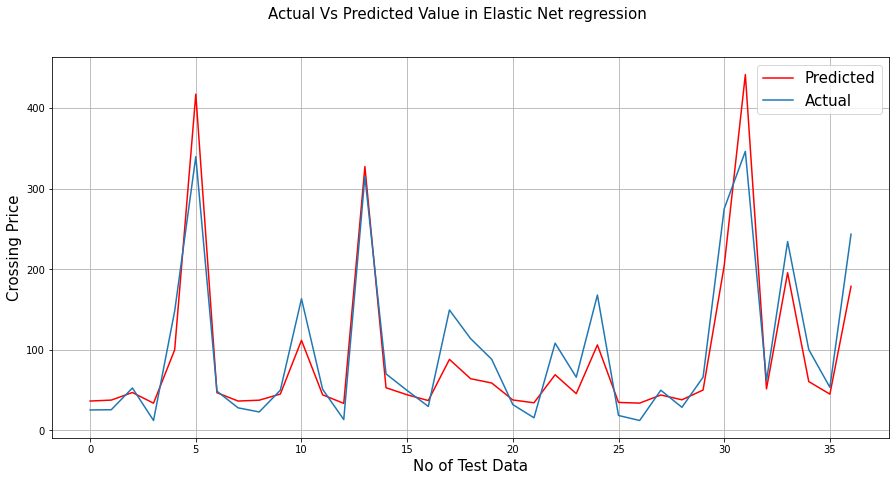

In [98]:
plt.figure(figsize=(15,7))
plt.plot(10**(y_pred),color='red')
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Value in Elastic Net regression', fontsize= 15)
plt.legend(['Predicted','Actual'], fontsize = 15)
plt.xlabel('No of Test Data', fontsize = 15)
plt.ylabel('Crossing Price', fontsize= 15)
plt.grid(True)

Using Cross-validation in Elastic net regression

---



In [99]:
# Hyper-Parameter Tuning

model = ElasticNet()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,1,2]}
model_cv= GridSearchCV(model,parameters,scoring='neg_mean_squared_error',cv=3)

In [100]:
model_cv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 2]},
             scoring='neg_mean_squared_error')

In [101]:
print("The best fit alpha and L1 ratio value is found out to be :" ,model_cv.best_params_['alpha'], model_cv.best_params_['l1_ratio'])
print("The negative mean squared error for is: ", round(model_cv.best_score_,3))

The best fit alpha and L1 ratio value is found out to be : 0.01 1
The negative mean squared error for is:  -0.035


In [102]:
y_pred = model_cv.predict(x_test)
y_pred

#(using same variable names as other models to avoid confusion and time)

array([1.5246758 , 1.53967822, 1.64330447, 1.48473667, 2.01244712,
       2.7285637 , 1.63520241, 1.52506422, 1.53318726, 1.62734999,
       2.07429343, 1.62111986, 1.48267825, 2.61894213, 1.7086131 ,
       1.61716593, 1.53236729, 1.9545761 , 1.81309013, 1.76452438,
       1.53980312, 1.49069997, 1.84005176, 1.64003515, 2.05511403,
       1.49942522, 1.48609019, 1.6186234 , 1.54359818, 1.67617522,
       2.39311476, 2.74618564, 1.68942791, 2.34233898, 1.78097189,
       1.62960909, 2.32426455])

In [103]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [104]:
test_df = pd.DataFrame(y_test)
test_df.rename(columns = {'close' : 'Actual closing price'} , inplace = True)
test_df['Predicted closing price In Elastic net regression with Cross-validation'] = y_pred

test_df.head()

,Close,Predicted closing price In Elastic net regression with Cross-validation
16,1.403464,1.524676
179,1.408240,1.539678
66,1.720903,1.643304
40,1.088490,1.484737
166,2.170115,2.012447


In [105]:
# Performance :

# Test Performance
print("MSE score:", round(mean_squared_error (y_test, y_pred), 4))
print("RMSE score:", round(math.sqrt(mean_squared_error (y_test, y_pred)), 4))
print("MAE score:", round(mean_absolute_error(y_test, y_pred), 4))
print("MAPE score:", round(mean_absolute_percentage_error(y_test, y_pred), 4))
print("R2 score:", round(r2_score(y_test, y_pred), 4))

MSE score: 0.0322
RMSE score: 0.1795
MAE score: 0.1528
MAPE score: 0.0968
R2 score: 0.819


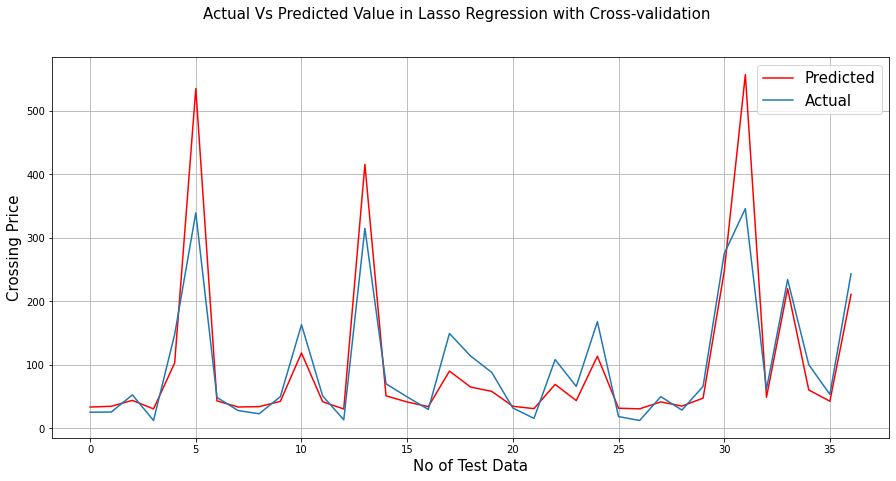

In [106]:
plt.figure(figsize=(15,7))
plt.plot(10**(y_pred),color='red')
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Value in Lasso Regression with Cross-validation', fontsize= 15)
plt.legend(['Predicted','Actual'], fontsize = 15)
plt.xlabel('No of Test Data', fontsize = 15)
plt.ylabel('Crossing Price', fontsize= 15)
plt.grid(True)